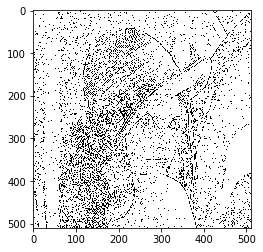

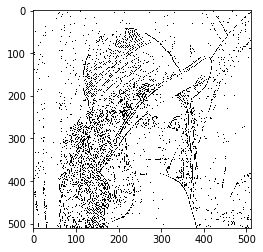

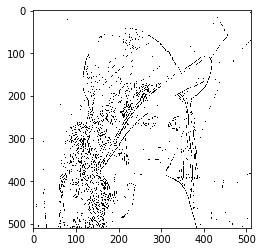

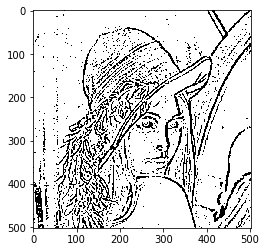

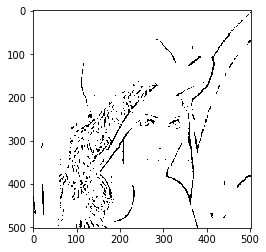

In [8]:
import cv2
import math, sys
import matplotlib.pyplot as plt
import numpy as np


####### IO ############
img = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

# a: part of image, b: conv kernel
def conv(a, b):
    
    ra, ca = a.shape
    rk, ck = b.shape
    assert a.shape == b.shape
    res = 0
    for i in range(ra):
        for j in range(ca):
            if ra - i - 1 >= 0 and ra - i - 1 < rk \
            and ca - j - 1 >= 0 and ca - j - 1 < ck:
                res += a[i, j] * b[ra - i - 1, ca - j - 1]
    return res

def laplace_1(img_in, threshold):
    k = np.array([
            [0, 1, 0],
            [1, -4, 1],
            [0, 1, 0]
        ])
    
    ra, ca = img_in.shape
    rk, ck = k.shape
    res = np.zeros((ra- rk + 1, ca - ck + 1))
    ra, ca = res.shape
    
    for i in range(ra):
        for j in range(ca):
            res[i, j] = conv(img_in[i:i + rk, j:j + ck], k)
    
    return (res <= threshold) * 255

def laplace_2(img_in, threshold):
    k = np.array([
            [1, 1, 1],
            [1, -8, 1],
            [1, 1, 1]
        ]) / 3
    
    ra, ca = img_in.shape
    rk, ck = k.shape
    res = np.zeros((ra- rk + 1, ca - ck + 1))
    ra, ca = res.shape
    
    for i in range(ra):
        for j in range(ca):
            res[i, j] = conv(img_in[i:i + rk, j:j + ck], k)
    
    return (res <= threshold) * 255

def min_var_laplace(img_in, threshold):
    k = np.array([
            [2, -1, 2],
            [-1, -4, -1],
            [2, -1, 2]
        ]) / 3
    
    ra, ca = img_in.shape
    rk, ck = k.shape
    res = np.zeros((ra- rk + 1, ca - ck + 1))
    ra, ca = res.shape
    
    for i in range(ra):
        for j in range(ca):
            res[i, j] = conv(img_in[i:i + rk, j:j + ck], k)
    
    return (res <= threshold) * 255

def laplace_of_gaussian(img_in, threshold):
    k = np.array([
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-2, -9, -23, -1, 103, 178, 103, -1, -23, -9, -2],
            [-1, -8, -22, -14, 52, 103, 52, -14, -22, -8, -1],
            [-1, -4, -15, -24, -14, -1, -14, -24, -15, -4, -1],
            [0, -2, -7, -15, -22, -23, -22, -15, -7, -2, 0],
            [0, 0, -2, -4, -8, -9, -8, -4, -2, 0, 0],
            [0, 0, 0, -1, -1, -2, -1, -1, 0, 0, 0]
        ])
        
    ra, ca = img_in.shape
    rk, ck = k.shape
    res = np.zeros((ra- rk + 1, ca - ck + 1))
    ra, ca = res.shape
    
    for i in range(ra):
        for j in range(ca):
            res[i, j] = conv(img_in[i:i + rk, j:j + ck], k)
    
    return (res <= threshold) * 255

def dif_of_gaussian(img_in, threshold):
    k = np.array([
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-8, -13, -17, 15, 160, 283, 160, 15, -17, -13, -8],
            [-7, -13, -17, 0, 85, 160, 85, 0, -17, -13, -7],
            [-6, -11, -16, -16, 0, 15, 0, -16, -16, -11, -6],
            [-4, -8, -12, -16, -17, -17, -17, -16, -12, -8, -4],
            [-3, -5, -8, -11, -13, -13, -13, -11, -8, -5, -3],
            [-1, -3, -4, -6, -7, -8, -7, -6, -4, -3, -1],
        ])
    
    ra, ca = img_in.shape
    rk, ck = k.shape
    res = np.zeros((ra- rk + 1, ca - ck + 1))
    ra, ca = res.shape
    
    for i in range(ra):
        for j in range(ca):
            res[i, j] = conv(img_in[i:i + rk, j:j + ck], k)
    
    return (res > threshold) * 255
    
def main():
    img_laplace_1 = laplace_1(img, 15)
    plt.imshow(img_laplace_1, cmap='gray')
    plt.show()
    cv2.imwrite('lena_laplace_1.png', img_laplace_1)
    
    img_laplace_2 = laplace_2(img, 15)
    plt.imshow(img_laplace_2, cmap='gray')
    plt.show()
    cv2.imwrite('lena_laplace_2.png', img_laplace_2)
    
    img_min_var_laplace = min_var_laplace(img, 20)
    plt.imshow(img_min_var_laplace, cmap='gray')
    plt.show()
    cv2.imwrite('lena_min_var_laplace.png', img_min_var_laplace)
    
    img_laplace_of_gaussian = laplace_of_gaussian(img, 3000)
    plt.imshow(img_laplace_of_gaussian, cmap='gray')
    plt.show()
    cv2.imwrite('lena_laplace_of_gaussian.png', img_laplace_of_gaussian)
    
    img_dif_of_gaussian = dif_of_gaussian(img, 1)
    plt.imshow(img_dif_of_gaussian, cmap='gray')
    plt.show()
    cv2.imwrite('lena_dif_of_gaussian.png', img_dif_of_gaussian)
    
if __name__ == '__main__':
    main()